---
# 1.1 Scientific computing
---

## Motivation

- Computers have become a central tool that is used in virtually every discipline:  

    - mathematics
    - engineering
    - physical sciences
    - social sciences
    - economics
    - data science
    - ...

- In these disciplines, **mathematical models** are used to explore and gain a deeper understanding of complex systems.

- There is now a growing need for those with the ability to develop software that can _efficiently_, _accurately_, and _reliably_ solve mathematical models.

## Overview

In this class, we will learn computational methods (algorithms) for working with _continuous_ mathematical models:
    
| Chapter | Topic |
|--------:|-------|
|  3 | Nonlinear Equations in One Variable |
| 10 | Polynomial Interpolation |
| 11 | Piecewise Polynomial Interpolation |
| 12 | Best Approximation |
| 14 | Numerical Differentiation |
| 15 | Numerical Integration |
| 16 | Differential Equations |

## Goals

Learning these algorithms will give you the knowledge and skills to solve more complex problems you may encounter in your careers. We will study:

1. The theory behind the algorithms (numerical analysis):
    - complexity and convergence rate
    - problem conditioning and algorithm stability
    - accuracy and error bounds
    - proofs
2. How to choose which method should be used for a particular problem.
3. How to implement the method efficiently.
    - We will use [Julia](http://julialang.org): "a high-level, high-performance dynamic programming language for technical computing."
    - See [Julia benchmarks](http://julialang.org/benchmarks/) for a comparison with various other languages.
4. How to evaluate and test your implementation for *efficiency*, *accuracy*, and *robustness*.

---
# Section 1.2: Numerical algorithms and errors
---

Suppose some quantity $u$ is approximated by $v$. The **absolute error** is measured by

$$
|u - v|.
$$

Often, it is better to look at how large $|u-v|$ is compared to $|u|$. If $|u-v|$ is $p$ percent of $|u|$, then 

$$
|u-v| = p|u|.
$$ 

If $u \neq 0$, then
$$
p = \frac{|u-v|}{|u|},
$$
which is called the **relative error**.

In [ ]:
u, v = π, 3.14159

In [ ]:
abs(u - v)

i.e., $\approx 2.65 \times 10^{-6}$

In [ ]:
p = abs(u - v)/abs(u)

i.e., $\approx 8.45 \times 10^{-7}$

---

## Exercise
Complete the following table.

| $u$ | $v$ | absolute error | relative error |
|:---:|:---:|:--------------:|:--------------:|
|   1 |  0.99 |  |  |
|   1 |  1.5  |  |  |
| 100 | 99.99 |  |  |
| 100 | 100.5 |  |  |

---

## Error types

1. Errors in mathematical model or in the data
2. Approximation errors
3. Roundoff errors
    - due to the finite precision of real numbers stored on a computer

## Approximation Error (approximating the derivative)

Consider the formula for the derivative of a differentiable function $f \colon \mathbb{R} \to \mathbb{R}$ at $x_0$:

$$ f'(x_0) = \lim_{h \to 0} \frac{f(x_0 + h) - f(x_0)}{h}.$$

It is therefore reasonable to approximate $f'(x_0)$ using

$$\frac{f(x_0 + h) - f(x_0)}{h}$$

for some small positive $h$. The error in this approximation is 

$$\left|f'(x_0) - \frac{f(x_0 + h) - f(x_0)}{h}\right|$$

and is called a **discretization error**.

---

## Example

Let's computationally examine this approximation error using

$$
f(x) = \sin(x) \quad \text{and} \quad x_0 = 1.
$$

Note that $f'(x) = \cos(x)$.

In [1]:
f(x) = sin(x)

f (generic function with 1 method)

Another way to define the function $f$ in Julia:
```
function f(x)
    return sin(x)
end
```

In [2]:
x0 = 1.0
fp = cos(x0)

0.5403023058681398

Thus 

$$f'(x_0) = \cos(1) = 0.5403023058681398\ldots.$$ 

Let's write some **Julia** code to approximate this value using 

$$ 
f'(x_0) \approx \frac{f(x_0 + h) - f(x_0)}{h}
$$

for smaller and smaller values of $h$.

In [3]:
using Printf

function foo(f, x0, fp)
    h = 1.0
    @printf("%8s %20s %14s\n", "h", "fpapprox", "abserr")
    for i in 1:20
        fpapprox = (f(x0 + h) - f(x0))/h
        abserr = abs(fp - fpapprox)
        #println(fpapprox, "  ", abserr)
        @printf("%8.1e %20.16f %14.6e\n", h, fpapprox, abserr)
        h = h/10
    end
end

foo(f, x0, fp)

       h             fpapprox         abserr
 1.0e+00   0.0678264420177852   4.724759e-01
 1.0e-01   0.4973637525353891   4.293855e-02
 1.0e-02   0.5360859810118690   4.216325e-03
 1.0e-03   0.5398814803603269   4.208255e-04
 1.0e-04   0.5402602314186211   4.207445e-05
 1.0e-05   0.5402980985058647   4.207362e-06
 1.0e-06   0.5403018851213303   4.207468e-07
 1.0e-07   0.5403022640404486   4.182769e-08
 1.0e-08   0.5403023028982544   2.969885e-09
 1.0e-09   0.5403023584094057   5.254127e-08
 1.0e-10   0.5403022473871032   5.848104e-08
 1.0e-11   0.5403011371640786   1.168704e-06
 1.0e-12   0.5403455460850636   4.324022e-05
 1.0e-13   0.5395683899678260   7.339159e-04
 1.0e-14   0.5440092820663266   3.706976e-03
 1.0e-15   0.5551115123125783   1.480921e-02
 1.0e-16   0.0000000000000000   5.403023e-01
 1.0e-17   0.0000000000000000   5.403023e-01
 1.0e-18   0.0000000000000000   5.403023e-01
 1.0e-19   0.0000000000000000   5.403023e-01


```
fpapprox = 0.5403023028982544
fp       = 0.5403023058681398
```

---

 ## Theorem: (Taylor Series)

Assume that $f$ is a function that is $(k+1)$-differentiable on an interval containing $x_0$ and $x_0 + h$. Then

$$
f(x_0 + h) = f(x_0) + h f'(x_0) + \frac{h^2}{2} f''(x_0) + \cdots + \frac{h^k}{k!} f^{(k)}(x_0) + \frac{h^{k+1}}{(k+1)!} f^{(k+1)}(\xi),
$$

for some $\xi \in (x_0, x_0 + h)$.

### Proof that the discretization error decreases at the same rate as $h$:

Solving for $f'(x_0)$ in the Taylor series expansion, we get

$$
f'(x_0) = \frac{f(x_0+h)-f(x_0)}{h} - \left(\frac{h}{2} f''(x_0) + \frac{h^2}{6} f'''(x_0)  + \cdots + \frac{h^{k-1}}{k!} f^{(k)}(\xi)\right).
$$

Therefore,

$$
\left|f'(x_0) - \frac{f(x_0+h)-f(x_0)}{h}\right| = \left|\frac{h}{2} f''(x_0) + \frac{h^2}{6} f'''(x_0) + \cdots + \frac{h^{k-1}}{k!} f^{(k)}(\xi)\right|.
$$

If $f''(x_0) \neq 0$ and $h$ is small, then the right-hand-side is dominated by $\frac{h}{2} f''(x_0)$. Thus,

$$
\left|f'(x_0) - \frac{f(x_0+h)-f(x_0)}{h}\right| \approx \frac{h}{2}\left| f''(x_0)\right| = \mathcal{O}(h). \quad \blacksquare
$$

(See p. 7 of Ascher-Greif for the rigorous definitions of Big-$\mathcal{O}$ and $\Theta$ notation).

## Example continued...

Recall that $f(x) = \sin(x)$. Thus $f''(x) = -\sin(x)$.

In [4]:
fpp = -sin(x0)

abs(fpp)/2

0.42073549240394825

In [5]:
h = 1e-5

err = h/2*abs(fpp)

4.207354924039483e-6

Therefore, 
$$
\frac{\left|f''(x_0)\right|}{2} = 0.42073549240394825\ldots,
$$
which agrees very well with our numerical test.

---

## Exercise

What do you think will happen if $f''(x_0) = 0$? Write code to test your hypothesis.

In [6]:
x0 = π

π = 3.1415926535897...

In [7]:
fp = cos(x0)

-1.0

In [8]:
foo(f, x0, fp)

       h             fpapprox         abserr
 1.0e+00  -0.8414709848078965   1.585290e-01
 1.0e-01  -0.9983341664682823   1.665834e-03
 1.0e-02  -0.9999833334166452   1.666658e-05
 1.0e-03  -0.9999998333332315   1.666668e-07
 1.0e-04  -0.9999999983354435   1.664556e-09
 1.0e-05  -0.9999999999898844   1.011558e-11
 1.0e-06  -1.0000000001396112   1.396112e-10
 1.0e-07  -0.9999999983634194   1.636581e-09
 1.0e-08  -0.9999999939225288   6.077471e-09
 1.0e-09  -1.0000000827403708   8.274037e-08
 1.0e-10  -1.0000000827403708   8.274037e-08
 1.0e-11  -1.0000000827403708   8.274037e-08
 1.0e-12  -1.0000889005823408   8.890058e-05
 1.0e-13  -0.9992007221626408   7.992778e-04
 1.0e-14  -1.0214051826551438   2.140518e-02
 1.0e-15  -0.8881784197001251   1.118216e-01
 1.0e-16   0.0000000000000000   1.000000e+00
 1.0e-17   0.0000000000000000   1.000000e+00
 1.0e-18   0.0000000000000000   1.000000e+00
 1.0e-19   0.0000000000000000   1.000000e+00


In [9]:
h = 1e-3

fppp = -cos(x0)

err = h^2/6*fppp

1.6666666666666665e-7

---

## Roundoff Error

Numbers are stored in the computer using a finite precision representation. Roughly 16 digits of precision are possible using the 64-bit floating point format.

Whenever an arithmetic operation takes place, the result must be rounded to roughly 16 digits of precision. Such an error is called **roundoff error**.

We can see the effect of roundoff error in our example when $h$ is very small.

---

## Exercise

Use the [Plots.jl](https://github.com/JuliaPlots/Plots.jl) package to make a plot of $h$ versus the absolute error in this approximation. What do you observe? Why is this happening?

In [10]:
x0 = 1.0
f(x) = sin(x)

fp = cos(x0)
fpp = -sin(x0)

-0.8414709848078965

In [37]:
using Plots, LaTeXStrings

x0 = 1.0

h = [10.0^(-x) for x in 0:0.5:20]

approx = (f.(x0 .+ h) .- f(x0))./h

[h approx]

abserr = abs.(fp .- approx)

d_err = h*abs(fpp)/2

[abserr d_err]

41×2 Array{Float64,2}:
 0.472476     0.420735
 0.140903     0.133048
 0.0429386    0.0420735
 0.0133938    0.0133048
 0.00421632   0.00420735
 0.00133138   0.00133048
 0.000420826  0.000420735
 0.000133057  0.000133048
 4.20744e-5   4.20735e-5
 1.33049e-5   1.33048e-5
 4.20736e-6   4.20735e-6
 1.33048e-6   1.33048e-6
 4.20747e-7   4.20735e-7
 ⋮            
 0.0136773    1.33048e-15
 0.0148092    4.20735e-16
 0.189219     1.33048e-16
 0.540302     4.20735e-17
 0.540302     1.33048e-17
 0.540302     4.20735e-18
 0.540302     1.33048e-18
 0.540302     4.20735e-19
 0.540302     1.33048e-19
 0.540302     4.20735e-20
 0.540302     1.33048e-20
 0.540302     4.20735e-21

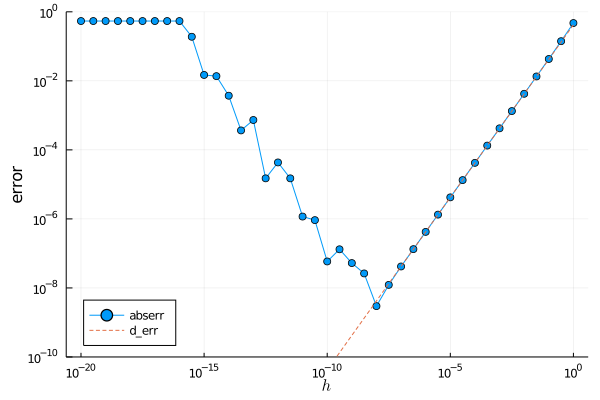

In [38]:
plot(h, abserr, xaxis=:log, yaxis=:log, 
    label="abserr", legend=:bottomleft, marker=:dot)
plot!(h, d_err, label="d_err", linestyle=:dash)
ylims!(1e-10, 1.0)
ylabel!("error")
xlabel!(L"h")

---
# 1.3 Algorithm properties
---

## Accuracy

As we have seen above, it is easy to write *mathematically correct* code that produces very inaccurate results.

Accuracy is affected by the following two conditions:

1. **Problem conditioning**  
    Some problems are highly sensitive to small changes in the input: we call such problems **ill-conditioned**. A problem that is not sensitive to small changes in the input is called **well-conditioned**. For example, computing $\tan(x)$ for $x$ near $\pi/2$ is an ill-conditioned problem (**Example 1.5** in Ascher-Greif).
2. **Algorithm stability**  
    An algorithm is called **stable** if it is guaranteed to produce an exact answer to a *slightly perturbed problem*. (**Example 1.6** in Ascher-Greif gives an example of an **unstable algorithm**).

---

## Exercise

Let 

$$ y_n = \int_0^1 \frac{x^n}{x + 10} dx. $$

Show that 

$$
y_n + 10y_{n-1} = \frac1n
$$

and that

$$
y_0 = \ln(11) - \ln(10).
$$

Then use these formulas to numerically compute $y_{30}$.

In [44]:
y = log(11) - log(10)

0.09531017980432477

In [45]:
for n = 1:30
    y = 1/n - 10*y
    println(y)
end

0.04689820195675232
0.031017980432476833
0.023153529008564988
0.01846470991435012
0.015352900856498819
0.013137658101678468
0.011480561840358172
0.010194381596418278
0.009167295146928323
0.00832704853071678
0.007638605601923115
0.0069472773141021765
0.007450303782055162
-0.0030744663919801962
0.09741133058646863
-0.9116133058646863
9.174956588058627
-91.69401032503072
916.9927348292546
-9169.877348292546
91698.82110197308
-916988.1655651854
9.169881699130116e6
-9.169881694963449e7
9.169881695363449e8
-9.169881695324987e9
9.169881695328691e10
-9.169881695328334e11
9.16988169532837e12
-9.169881695328366e13


This algorithm is *very* **unstable**.

---

## Efficiency

Efficiency of a code is affected by many factors:

1. the rate of convergence of the method
2. the number of arithmetic operations performed
3. how the data in memory is accessed

(See **Example 1.4** in Ascher-Greif for an efficient algorithm for evaluating polynomials: **Horner's rule**.)

---

## Robustness (Reliability)

We want to ensure that our code works under *all possible inputs*, and generates the clear warnings when it is not possible to produce an accurate result for some input.

---